In [1]:
#Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import PIL

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from pathlib import Path
import os
import itertools

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
#Getting list of GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU's Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPU's Available:  1


In [3]:
#Setting path for train and test datasets
path = '/Users/stefanrodrigues/Documents/Study/Semester_2/MachineLearning/Assessment_1/blood_cell_data'
train_path = path+'/TRAIN'
test_path = path+'/TEST'

In [4]:
#list of 4 different blood cells from test directory
train_path, train_dirs, train_files = next(os.walk(train_path))
print(train_dirs)

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']


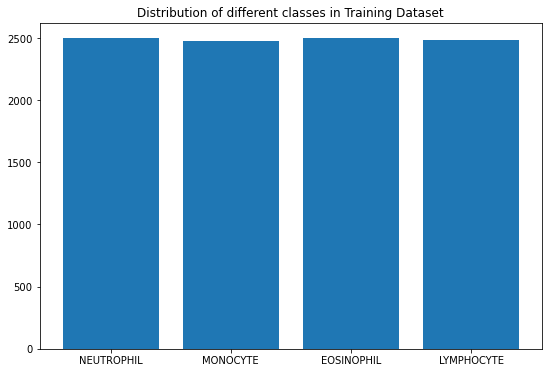

In [5]:
#Plotting count of images in each type of blood cell
images = {}
for i in train_dirs:
    list_of_images = len(os.listdir(train_path+'/'+i+'/'))
    images[i] = list_of_images
plt.figure(figsize=(9, 6))
plt.bar(range(len(images)), list(images.values()), align='center')
plt.xticks(range(len(images)), list(images.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [6]:
#Count for each class of blood cells 
for i in train_dirs:
    print("TRAINING {} IMAGES ARE ".format(i)+str(len(os.listdir(train_path+'/'+i+'/'))))

TRAINING NEUTROPHIL IMAGES ARE 2499
TRAINING MONOCYTE IMAGES ARE 2478
TRAINING EOSINOPHIL IMAGES ARE 2497
TRAINING LYMPHOCYTE IMAGES ARE 2483


In [7]:
#list of 4 different blood cells from train directory
test_path, test_dirs, test_files = next(os.walk(test_path))
print(test_dirs)

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']


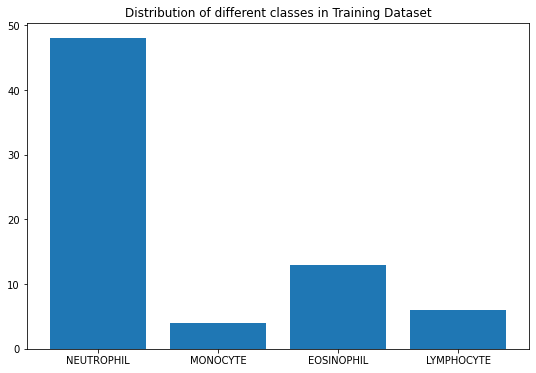

In [8]:
#Plotting count of images in each type of blood cell
images = {}
for i in test_dirs:
    list_of_images = len(os.listdir(test_path+'/'+i+'/'))
    images[i] = list_of_images
plt.figure(figsize=(9, 6))
plt.bar(range(len(images)), list(images.values()), align='center')
plt.xticks(range(len(images)), list(images.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [9]:
#Count for each class of blood cells 
for i in test_dirs:
    print("TESTING {} IMAGES ARE ".format(i)+str(len(os.listdir(test_path+'/'+i+'/'))))

TESTING NEUTROPHIL IMAGES ARE 48
TESTING MONOCYTE IMAGES ARE 4
TESTING EOSINOPHIL IMAGES ARE 13
TESTING LYMPHOCYTE IMAGES ARE 6


In [10]:
#Preprocess the images using vgg16 and defining batch size 
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                            rescale=1./255.0,
                            validation_split=0.20)
train_set = datagen.flow_from_directory(directory=train_path, 
                                        subset="training",
                                        target_size=(224,224), 
                                        classes=train_dirs,
                                        batch_size=32,
                                        class_mode='categorical')
valid_set = datagen.flow_from_directory(directory=train_path,
                                        subset="validation",
                                        target_size=(224,224), 
                                        classes=train_dirs, 
                                        batch_size=32,
                                        class_mode='categorical')
test_set = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                              rescale=1./255.0).flow_from_directory(directory=test_path, 
                                                                    target_size=(224,224), 
                                                                    classes=test_dirs, 
                                                                    batch_size=10,
                                                                    class_mode='categorical', 
                                                                    shuffle=False)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [11]:
#Plot Image function from tensorflow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
#Splitting images and labels for train set
imgs, labels = next(train_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

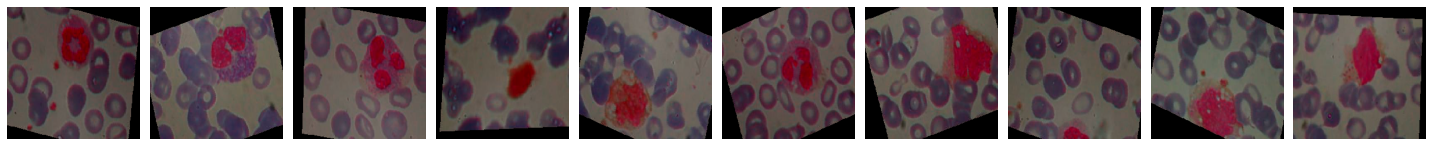

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [13]:
#Plotting images
plotImages(imgs)
print(labels)

In [14]:
#Creating the model
model = Sequential([
        #CNN layers
        Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2)),
        
        Conv2D(filters=32, kernel_size=(3, 3),activation='relu',padding='same'),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(filters=64, kernel_size=(3, 3),activation='relu',padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3),activation='relu',padding='same'),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(filters=128, kernel_size=(3, 3),activation='relu'),
        Conv2D(filters=128, kernel_size=(3, 3),activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Conv2D(filters=256, kernel_size=(3, 3),activation='relu'),
        Conv2D(filters=256, kernel_size=(3, 3),activation='relu'),
        Conv2D(filters=256, kernel_size=(3, 3),activation='relu'),
        MaxPool2D(pool_size=(2, 2)),

        Flatten(),
        #Dense layers
        Dense(units=512, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=4, activation='softmax')
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-30 11:55:29.175512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-30 11:55:29.175628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [16]:
#Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [17]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Training the model
history = model.fit(x=train_set, validation_data=valid_set, callbacks=[callback],epochs=20, verbose=2)

2022-10-30 11:55:29.745133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-30 11:55:29.746276: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-10-30 11:55:29.984402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-10-30 11:56:07.100914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


249/249 - 40s - loss: 1.2733 - accuracy: 0.3678 - val_loss: 1.0275 - val_accuracy: 0.5445
Epoch 2/20
249/249 - 39s - loss: 0.9697 - accuracy: 0.5818 - val_loss: 0.8185 - val_accuracy: 0.6461
Epoch 3/20
249/249 - 38s - loss: 0.7234 - accuracy: 0.7026 - val_loss: 0.6017 - val_accuracy: 0.7536
Epoch 4/20
249/249 - 38s - loss: 0.5106 - accuracy: 0.7909 - val_loss: 0.5762 - val_accuracy: 0.7466
Epoch 5/20
249/249 - 41s - loss: 0.3738 - accuracy: 0.8470 - val_loss: 0.3176 - val_accuracy: 0.8567
Epoch 6/20
249/249 - 46s - loss: 0.2958 - accuracy: 0.8810 - val_loss: 0.2162 - val_accuracy: 0.9145
Epoch 7/20
249/249 - 46s - loss: 0.2148 - accuracy: 0.9094 - val_loss: 0.1873 - val_accuracy: 0.9231
Epoch 8/20
249/249 - 46s - loss: 0.2079 - accuracy: 0.9170 - val_loss: 0.1690 - val_accuracy: 0.9276
Epoch 9/20
249/249 - 47s - loss: 0.2076 - accuracy: 0.9152 - val_loss: 0.2142 - val_accuracy: 0.9085
Epoch 10/20
249/249 - 47s - loss: 0.1506 - accuracy: 0.9356 - val_loss: 0.1392 - val_accuracy: 0.9412


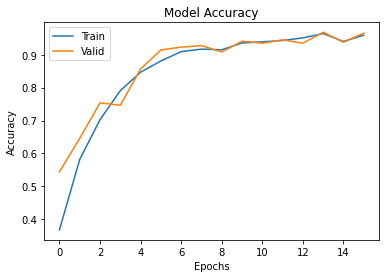

In [19]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

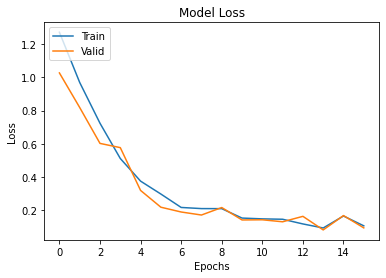

In [20]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

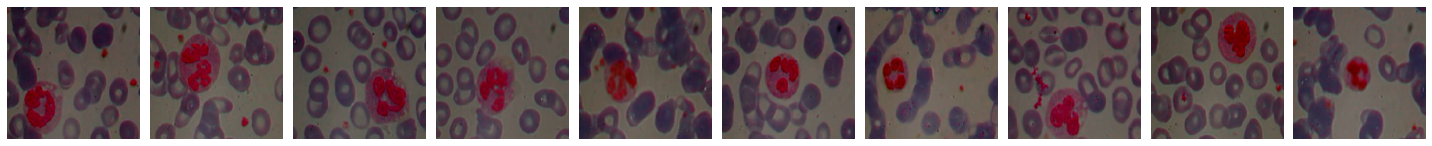

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [21]:
#Splitting images and labels for test set
test_imgs, test_labels = next(test_set)
plotImages(test_imgs)
print(test_labels)

In [22]:
#Labels for test set
y_true = test_set.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3]


In [23]:
#Predictions using test set
predictions = model.predict(x=test_set, verbose=0)

2022-10-30 12:07:45.907078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
#Rounding of predictions for evaluation
y_pred = np.argmax(predictions, axis=-1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 2 2 2 2 0 2 0 2 2 2 2 2 3 3 3 3 3 3]


In [25]:
#Model Evaluation
accuracy = accuracy_score(y_true, y_pred)*100
print("Accuracy score: {:.4f}".format(accuracy))
#calculating precision and recall score
pr_sc = precision_score(y_true, y_pred, average='macro')*100
print("Precision Score: {}".format(pr_sc))
rc_sc = recall_score(y_true, y_pred, average='macro')*100
print("Recall Score: {}".format(rc_sc))
f1_sc = 2 * (pr_sc*rc_sc)/(pr_sc+rc_sc)
print("F1 Score: {}".format(f1_sc))

Accuracy score: 91.5493
Precision Score: 93.83333333333333
Recall Score: 86.93910256410257
F1 Score: 90.25475316631501


In [33]:
#Classification Report
print("Classification Report: \n",classification_report(y_true, y_pred, target_names=test_dirs))

Classification Report: 
               precision    recall  f1-score   support

  NEUTROPHIL       0.92      0.96      0.94        48
    MONOCYTE       1.00      0.75      0.86         4
  EOSINOPHIL       0.83      0.77      0.80        13
  LYMPHOCYTE       1.00      1.00      1.00         6

    accuracy                           0.92        71
   macro avg       0.94      0.87      0.90        71
weighted avg       0.92      0.92      0.91        71



In [27]:
#Confusion Matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [28]:
#Plot confusion matrix method
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="Blues"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[46  0  2  0]
 [ 1  3  0  0]
 [ 3  0 10  0]
 [ 0  0  0  6]]


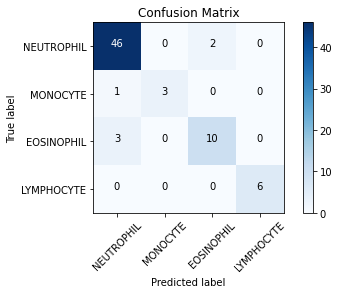

In [29]:
#Plotting the confusion matrix
cm_plot_labels = test_dirs
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
#Count for each class of blood cells in test set
for i in test_dirs:
    print("Test {} Image count: ".format(i)+str(len(os.listdir(test_path+'/'+i+'/'))))

Test NEUTROPHIL Image count: 48
Test MONOCYTE Image count: 4
Test EOSINOPHIL Image count: 13
Test LYMPHOCYTE Image count: 6


In [31]:
#Calculation Percentage for confusion matrix
cm_percent = cm
#NEUTROPHIL
for i in range(0,4):
    cm_percent[0][i] = (cm[0][i]/48)*100
#MONOCYTE
for i in range(0,4):
    cm_percent[1][i] = (cm[1][i]/4)*100
#EOSINOPHIL
for i in range(0,4):
    cm_percent[2][i] = (cm[2][i]/13)*100
#LYMPHOCYTE
for i in range(0,4):
    cm_percent[3][i] = (cm[3][i]/6)*100
    

Confusion matrix, without normalization
[[ 95   0   4   0]
 [ 25  75   0   0]
 [ 23   0  76   0]
 [  0   0   0 100]]


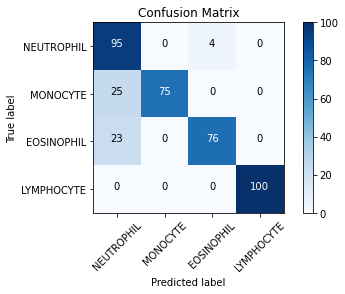

In [32]:
#Plotting confusion matrix in percentage
plot_confusion_matrix(cm=cm_percent,classes=cm_plot_labels, title='Confusion Matrix')